#### Certainly! Here's an outline for a professional presentation on your Prime Minister Speech Sentiment Analysis project:

## Slide 1: Title Slide
### Title: "Sentiment Analysis of the Prime Minister's Speech in Parliament"
### Subtitle: "An NLP-Based Approach Using Python"
### Your Name: Anuj Kumar
### Date: August 2024

## Slide 2: Introduction
### Overview: Brief introduction to the context—why analyzing the sentiment of the Prime Minister’s speech is important.
### Objective: Explain the goal of the analysis—understanding the sentiment behind the speech using NLP techniques.

## Slide 3: Data Collection
### Data Source: Describe where and how you obtained the speech transcripts.
### Speech Context: Mention the specific speech or speeches analyzed.

## Slide 4: Data Preprocessing
### Text Cleaning: Describe the steps you took to preprocess the text (e.g., removing stop words, stemming, lemmatization).
### Tokenization: Explain how the speech was broken down into analyzable units.

## Slide 5: Sentiment Analysis Approach
### Methodology: Describe the NLP techniques used for sentiment analysis (e.g., VADER, TextBlob, machine learning models).
### Model Training: Explain if any models were trained specifically for this task.

## Slide 6: Sentiment Analysis Results
### Visualization: Include visualizations (e.g., word clouds, sentiment polarity scores, distribution of positive/negative/neutral sentiments).
### Key Findings: Summarize the main sentiments detected in the speech.

## Slide 7: Insights
### Political Implications: Discuss the implications of the sentiment analysis on public perception or political strategy.
### Trends: Highlight any trends in sentiment across different parts of the speech.

## Slide 8: Model Evaluation
### Accuracy Metrics: Provide accuracy, precision, recall, or F1 scores if applicable.
### Interpretation: Explain how well the sentiment analysis model performed.

## Slide 9: Conclusion
### Summary: Recap the key points of your analysis.
### Significance: Discuss why these insights are important and how they could be used.

In [2]:
#!pip install nltk
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## load file

In [4]:
# Read and print the first few lines with a specific encoding
with open("speech.txt", 'r', encoding='utf-8', errors='ignore') as file:
    for i in range(10000):
        print(file.readline())
        


“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”



“Many key legislations did not get the discussion they deserved as the opposition put politics above them”



“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”



“We have given the youth of India a government free of scams”



“Today a trust has arisen in the heart of the poor to fulfill his dreams”



“Opposition is not able to see the trust of people as they are so steeped in distrust”



“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”



“Opposition believes in changing names but they can’t change their work culture”



“Freedom fighters and founding fathers of the country always opposed dynasty politics”



“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the gu

In [5]:
file_path = "speech.txt"
with open(file_path, "r", encoding='utf-8') as file:
    speech_text = file.read()
print(file_path)
print(speech_text)

speech.txt
“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”

“Many key legislations did not get the discussion they deserved as the opposition put politics above them”

“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”

“We have given the youth of India a government free of scams”

“Today a trust has arisen in the heart of the poor to fulfill his dreams”

“Opposition is not able to see the trust of people as they are so steeped in distrust”

“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”

“Opposition believes in changing names but they can’t change their work culture”

“Freedom fighters and founding fathers of the country always opposed dynasty politics”

“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the guilty ar

## Data Cleaning

In [6]:
speech_text_cleaned233 = re.sub(r'[^a-zA-Z0-9]',' ', speech_text)
speech_text_cleaned233

' I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government    Many key legislations did not get the discussion they deserved as the opposition put politics above them    This time period of the 21st century will impact the country for the next thousand years  We all should have a single focus    We have given the youth of India a government free of scams    Today a trust has arisen in the heart of the poor to fulfill his dreams    Opposition is not able to see the trust of people as they are so steeped in distrust    In 2028  when you will bring a No Confidence Motion  the Country will be among the top 3    Opposition believes in changing names but they can t change their work culture    Freedom fighters and founding fathers of the country always opposed dynasty politics    Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the guilty are punished

In [7]:
speech_text_cleaned = re.sub(r'[^\w\s]','', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]
word_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

## Check Stop Words

In [8]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
words

['i',
 'have',
 'come',
 'to',
 'express',
 'immense',
 'gratitude',
 'towards',
 'each',
 'and',
 'every',
 'citizen',
 'of',
 'india',
 'for',
 'repeatedly',
 'showing',
 'their',
 'trust',
 'in',
 'the',
 'government',
 'many',
 'key',
 'legislations',
 'did',
 'not',
 'get',
 'the',
 'discussion',
 'they',
 'deserved',
 'as',
 'the',
 'opposition',
 'put',
 'politics',
 'above',
 'them',
 'this',
 'time',
 'period',
 'of',
 'the',
 '21st',
 'century',
 'will',
 'impact',
 'the',
 'country',
 'for',
 'the',
 'next',
 'thousand',
 'years',
 'we',
 'all',
 'should',
 'have',
 'a',
 'single',
 'focus',
 'we',
 'have',
 'given',
 'the',
 'youth',
 'of',
 'india',
 'a',
 'government',
 'free',
 'of',
 'scams',
 'today',
 'a',
 'trust',
 'has',
 'arisen',
 'in',
 'the',
 'heart',
 'of',
 'the',
 'poor',
 'to',
 'fulfill',
 'his',
 'dreams',
 'opposition',
 'is',
 'not',
 'able',
 'to',
 'see',
 'the',
 'trust',
 'of',
 'people',
 'as',
 'they',
 'are',
 'so',
 'steeped',
 'in',
 'distrust

## Using Lemitization

In [10]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
words_lemmatized

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 '

## There we use SentimentIntensityAnalyzer

In [11]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores)/len(sentiment_scores)
average_sentiment

0.014298377028714108

## Check Score

In [12]:
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 -0.5719,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4767,
 0.4404,
 0.25,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.1531,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 0.0,
 -0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 -0.4215,
 -0.4588,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.3818,
 0.0,
 0.0,
 0.4019,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,


In [13]:
sum(sentiment_scores)

22.906000000000002

In [14]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

## There We Check How Many Positive words,Negative words and Neutral words

In [16]:
print("The positive words are :", positive_words)

The positive words are : ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'as

In [17]:
print("The negative words are :", negative_words)

The negative words are : ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [18]:
print("The neutral words are :", neutral_words)

The neutral words are : ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', 

## Visualization

In [19]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)
print(word_freq_positive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 74 samples and 138 outcomes>
<FreqDist with 61 samples and 82 outcomes>
<FreqDist with 658 samples and 1382 outcomes>


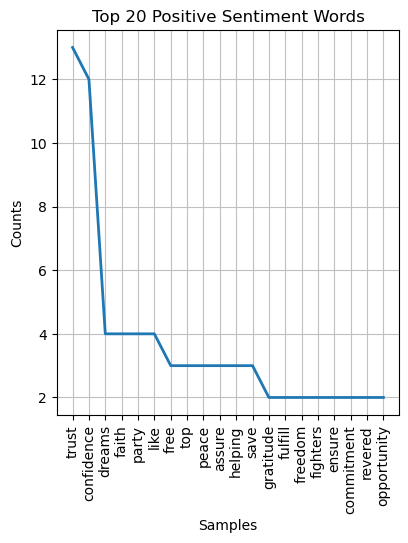

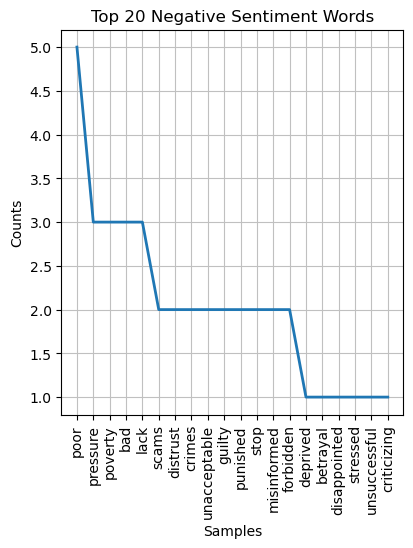

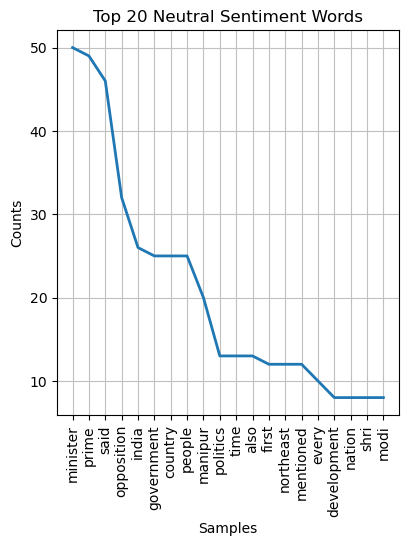

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(131)
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [21]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])
print(df_positive)
print("***************"*5)
print(df_negative)
print("***************"*5)
print(df_neutral)
print("***************"*5)

           Word  Frequency
0         trust         13
1    confidence         12
2        dreams          4
3         faith          4
4         party          4
5          like          4
6          free          3
7           top          3
8         peace          3
9        assure          3
10      helping          3
11         save          3
12    gratitude          2
13      fulfill          2
14      freedom          2
15     fighters          2
16       ensure          2
17   commitment          2
18      revered          2
19  opportunity          2
***************************************************************************
            Word  Frequency
0           poor          5
1       pressure          3
2        poverty          3
3            bad          3
4           lack          3
5          scams          2
6       distrust          2
7         crimes          2
8   unacceptable          2
9         guilty          2
10      punished          2
11          stop     

In [22]:
fig_positive = px.bar(df_positive, x ='Word', y='Frequency', title='Top 20 Positive Sentiment Words')
fig_negative = px.bar(df_negative, x ='Word', y='Frequency', title='Top 20 Negative Sentiment Words')
fig_neutral = px.bar(df_neutral, x ='Word', y='Frequency', title='Top 20 Neutral Sentiment Words')

fig_positive.show()
print()
fig_negative.show()
print()
fig_neutral.show()

## Using World Cloud

In [23]:
wordcloud_positve = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color='blue').generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_neutral)

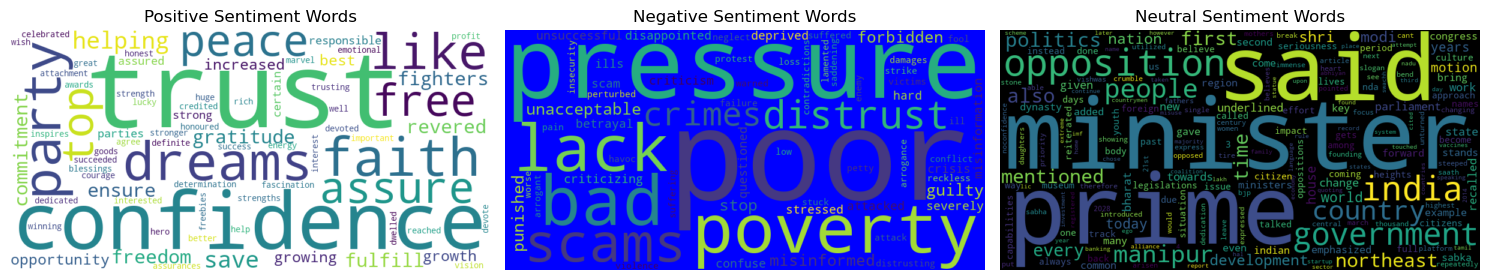

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(wordcloud_positve, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

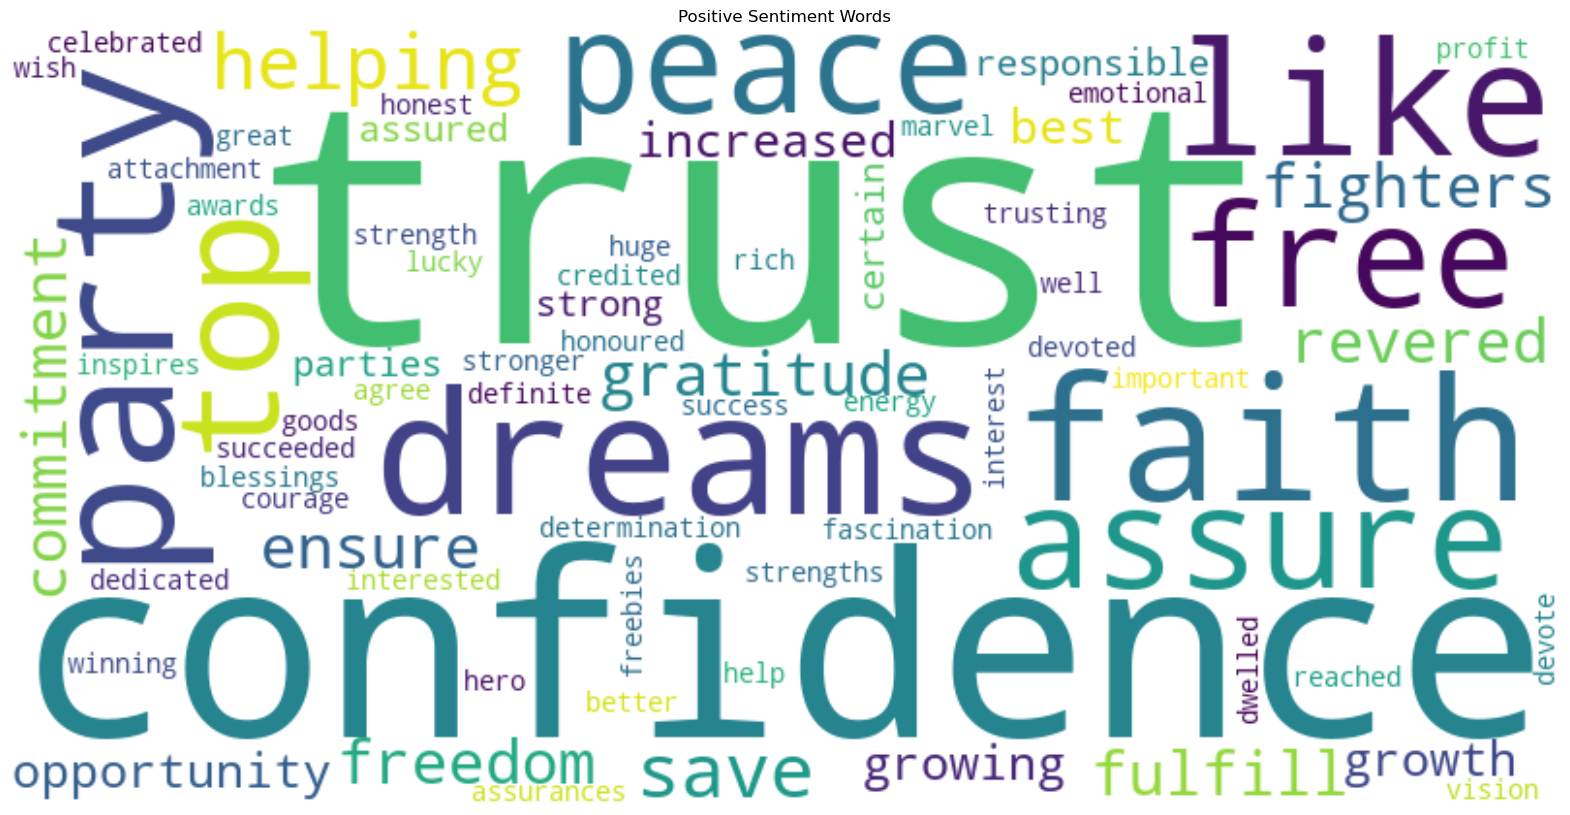

In [25]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_positve, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")
plt.show()

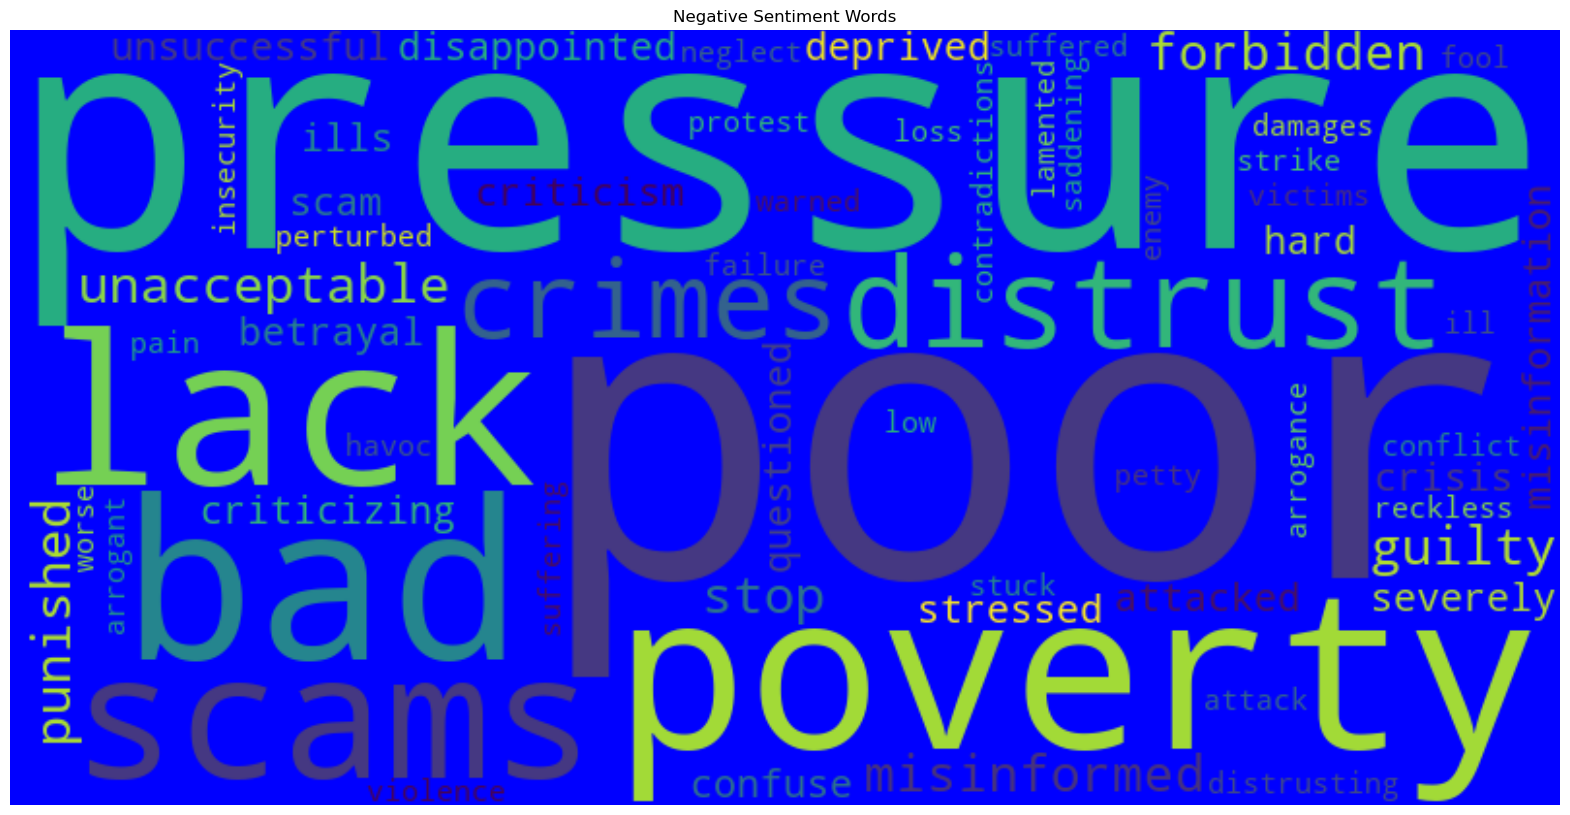

In [26]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")
plt.show()

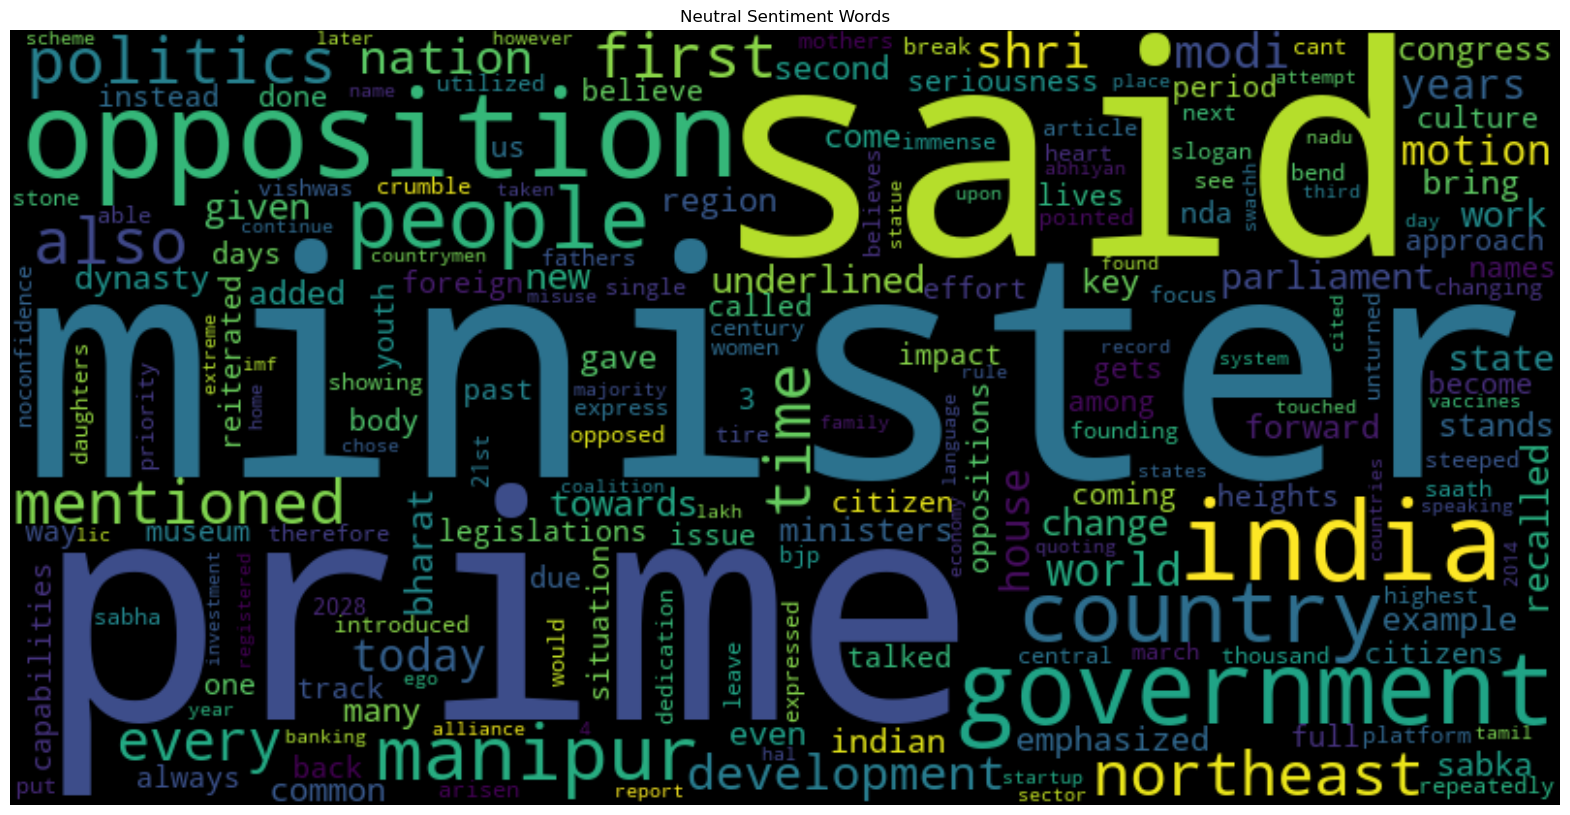

In [27]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")
plt.show()